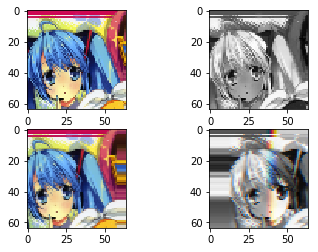

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import model_from_json
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, array_to_img, load_img, random_rotation, random_zoom, random_shift
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
%matplotlib inline

#------------変数宣言------------
img_size = 64

#csvのファイルパスを記載
csv_filepath = 'filename_test.csv'

#水増し処理の種類を記載
img_pro = 4


#------------処理ここから------------


#csvからファイルパスを読み込む
csv_file = pd.read_csv(csv_filepath, encoding="UTF-8")#もしくわUTF-8

#csvに記載しているファイルパス、ラベル、総数を格納
fnames = csv_file['filepath']
labels = csv_file['label']
fnames_total = len(fnames)

#データセットを格納する変数の初期化
img_train = np.zeros((fnames_total*img_pro,img_size,img_size,3))

#データセットの格納
#前処理する場合はここでやる
for i,fname in enumerate(fnames):

    temp_img = load_img(fname, target_size=(img_size,img_size))

    #画像を配列に変換し0-1で正規化
    temp_img_array = img_to_array(temp_img)
    temp_img_array = temp_img_array.astype('float32')/255.0
    
    #水増し処理を行う
    #ズーム処理
    #heightとwidthsそれぞれ独立でランダムな値、0.5だと2倍に拡大
    temp_img_array_zoom = random_zoom(temp_img_array, zoom_range=(0.5,1))
    
    #シフト
    #0.1だとピクセル幅*0.1倍された値を上限としてランダムにシフト
    temp_img_array_shift = random_shift(temp_img_array, wrg=0.1, hrg=0.1)
    
    #回転
    temp_img_array_rotation = random_rotation(temp_img_array, rg=45)
    
    #水増し後の処理を配列に格納する
    img_train[(img_pro*i)] = temp_img_array
    img_train[(img_pro*i) + 1] = temp_img_array_zoom
    img_train[(img_pro*i) + 2] = temp_img_array_shift
    img_train[(img_pro*i) + 3] = temp_img_array_rotation    
    
    
#print(img_train[0])
#print("-----------")
#print(img_train[1])


#画像の表示   
plt.subplot(221)
plt.imshow(img_train[0])
plt.subplot(222)
plt.imshow(img_train[1])
plt.subplot(223)
plt.imshow(img_train[2])
plt.subplot(224)
plt.imshow(img_train[3])
plt.show()